In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
rows=session.query(measurement.date).order_by(measurement.date.desc()).first()
#getting string 
for each_row in rows:
    mrd=each_row
#converting string to datime
most_recent_date=datetime.strptime(mrd,'%Y-%m-%d')
most_recent_date



datetime.datetime(2017, 8, 23, 0, 0)

2016-08-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


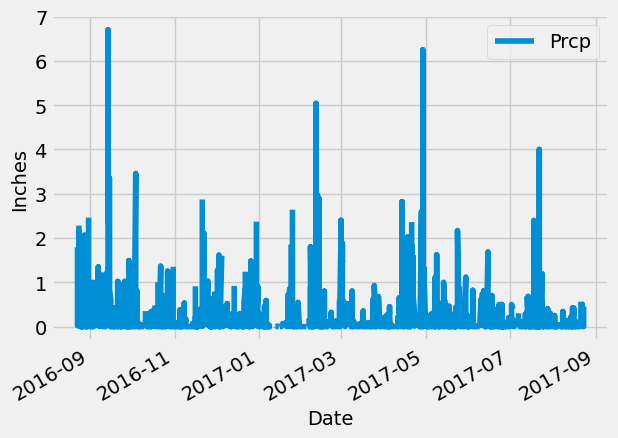

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
year_ago=most_recent_date-dt.timedelta(days=366)
print(year_ago)
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
scores=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date>=year_ago).filter(measurement.date<=most_recent_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df=pd.DataFrame(scores,columns=['Date','Prcp'])
precipitation_df

#convert to date

precipitation_df['Date']=pd.to_datetime(precipitation_df['Date'])
print(type(precipitation_df.Date[0]))
#Sort values by date
precipitation_df=precipitation_df.sort_values(by='Date')
#set index on date
pre_df=precipitation_df.set_index("Date")
pre_df
# Use Pandas Plotting with Matplotlib to plot the data

pre_df.plot()
#pre_df.plot.bar(x='Date',y='Prcp',rot=0)

plt.ylabel('Inches')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
pre_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations=session.query(station.station,func.count(station.station)).all()
stations

[('USC00519397', 9)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Getting most active statio ID
most_active=session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
for each_most in most_active:
    station_id,count_station_id=most_active
#Getting highest, lowest and average and printin
gettting_lha=session.query(measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == station_id).all()
for eachg in gettting_lha:
    print (eachg)

('USC00519281', 54.0, 85.0, 71.66378066378067)


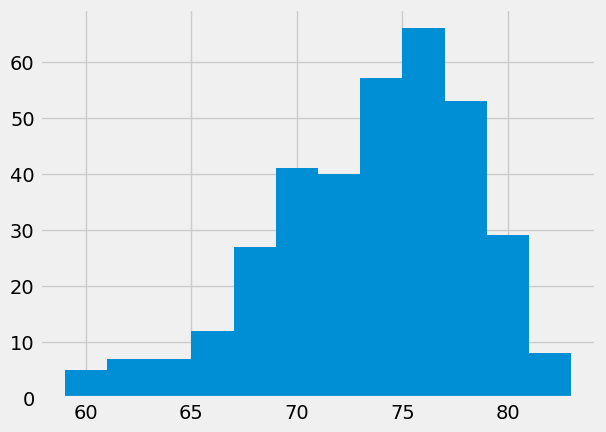

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_most_active=session.query(measurement.tobs).filter(measurement.station == station_id).\
    filter(measurement.date>=year_ago).filter(measurement.date<=most_recent_date).all()
temperature=[]
for each_y in last_year_most_active:
    temperature.append(each_y)
temperature
tobs_df=pd.DataFrame(last_year_most_active,columns=['Tobs'])
tobs_df
plt.hist(tobs_df,bins=12)
plt.show()



# Close Session

In [91]:
# Close Session
session.close()